<a href="https://colab.research.google.com/github/spchaane/DS-Python-Projects/blob/main/ml4eo_bootcamp_application_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Application Exercises

These exercises will be used to evaluate your ability to work with geospatial data in Python. You will need several python packages to complete these exercises, the packages required are as follows:

* geopandas
* pandas
* rasterio
* fiona
* pycrs

For each cell where you see "WRITE YOUR CODE HERE" delete the return notImplemented statement when you write your code there - don't leave it in the notebook. This notebook contains test cases to evaluate whether your functions are working correctly. When you run these cells they will print either "Congratulations, all is working just fine !!!" if your function works or "Sorry wrong answer" if it does not. Once you finish these exercises, upload the completed notebook to the application page and submit your application.

In case of any questions, contact the organizers at hello@radiant.earth

In [101]:
pip install geopandas

### Reading in data using GeoPandas
[GeoPandas](https://geopandas.org/) is a Python library that is particularly good for doing any geospatial-data-related tasks in Python. We will use several other libraries in Python as well.

To test that everything is working fine:
1. Ensure that all of the files from the repository are in the same directory as this notebook.
2. Use GeoPandas to read in the first sheet of data from the geojson file as shown below
3. Work through some of the example analyses shown and complete the questions that follow.

In [102]:
import geopandas
import pandas as pd

data = geopandas.read_file("crops.geojson")
data.head() # show the first 5 rows of the data.

,Field ID,Latitude,Longitude,Accuracy,Survey Date,Water Resource,Planting Date,PlantingDate Method,Estimated Harvest Date,Crop1,Crop2,Crop3,Crop4,Crop5,Crop Density,Variety,CMD Rating,CBSD Rating,CGM Rating,Disease Rating,geometry
0,5.1,0.538299,34.22033,3.216,2019-05-16,rainfed,2018-08-13,Recorded,2019-06-13,Cassava,,,,,40,Tanzania,NULL,NULL,NULL,NULL,"POLYGON ((635776.260 59518.908, 635798.727 595..."
1,5.101,0.538204,34.22009,4.288,2019-05-16,rainfed,2019-03-01,Estimated,2019-12-01,Maize,,,,,50,Null,NULL,NULL,NULL,NULL,"POLYGON ((635766.485 59501.773, 635765.180 595..."
2,6.1,0.539152,34.22034,4.288,2019-05-16,rainfed,2019-04-03,Recorded,2020-01-03,Maize,Groundnut,,,,60,DH 04,NULL,NULL,NULL,NULL,"POLYGON ((635800.201 59601.742, 635774.494 595..."
3,6.101,0.539092,34.22031,3.216,2019-05-16,rainfed,2019-03-01,Estimated,2019-12-01,Maize,,,,,30,Null,NULL,NULL,NULL,NULL,"POLYGON ((635798.934 59597.331, 635819.341 596..."
4,6.2,0.539539,34.22064,4.288,2019-05-16,rainfed,2019-04-03,Recorded,2020-01-03,Maize,Bean,,,,45,Null,NULL,NULL,NULL,NULL,"POLYGON ((635829.837 59634.348, 635812.466 596..."


### Dataset Description

This dataset contains field boundaries for crop fields in Kenya as well as the crop types present. Each field can have multiple crops present and are represented in the "Crop1", "Crop2", "Crop3", "Crop4", and "Crop5" columns. Each record also has the date the survey was conducted, when the crops were planted, an estimated harvest date, and whether the planting date is an estimate.

### Listing all of the different types of crops present in this dataset

In [103]:
list(pd.unique(data[['Crop1', 'Crop2', 'Crop3', 'Crop4', 'Crop5']].values.ravel('K')))

['Cassava',
 'Maize',
 'Sorghum',
 'Bean',
 'Groundnut',
 'Fallowland',
 'Millet',
 'Tomato',
 'Sugarcane',
 'Sweetpotato',
 'Banana',
 '',
 'Cowpea',
 'Soybean']

### For you to do

In [104]:
# Write your code to complete the following functions

def get_crop_area(crop):
    # Calculate the total area in square meters of the fields which contain the selected crop
    
    area = 0
   
    for index, row in data.iterrows():

      if crop in row['Crop1'] or crop in row['Crop2'] or crop in row['Crop3'] or crop in row['Crop4'] or crop in row['Crop5']:
        area += row['geometry'].area 
    return area

In [105]:
# Run this to validate your function works correctly

assert int(get_crop_area('Maize')) == 192534, "Sorry wrong answer"
assert int(get_crop_area('Sorghum')) == 227, "Sorry wrong answer"
assert int(get_crop_area('Banana')) == 946, "Sorry wrong answer"
print("Congratulations, all is working just fine !!!")

Congratulations, all is working just fine !!!


In [106]:
pip install rasterio

In [107]:
pip install pycrs

In [108]:
import fiona
import rasterio
import rasterio.mask
import pycrs

from rasterio.plot import show
from rasterio.plot import show_hist
from rasterio.mask import mask
from shapely.geometry import box
from fiona.crs import from_epsg


In [140]:
file = 'crops.tif'

data_1 = rasterio.open(file)

print(data_1.shape)

(1348, 1065)


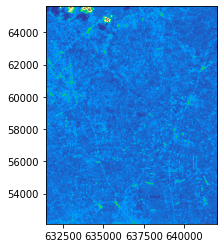

In [141]:
show((data_1, 3), cmap='terrain')

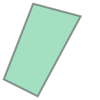

In [147]:
data.geometry[0]

In [111]:
#Create bounding box with shapely: 
# WGS84 coordinates are:
minx, miny = 24.60, 60.00
maxx, maxy = 25.22, 60.35
bbox = box(minx, miny, maxx, maxy)

In [112]:
#Inserting the bounding_box into a GeoDataFrame:
geo = geopandas.GeoDataFrame({'geometry': bbox}, index=[0], crs=from_epsg(4326))

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [113]:
#Re-project into the same coordinate system as the raster data
geo = geo.to_crs(crs=data_1.crs.data)

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


### Extra Bonus questions

In [152]:
import fiona
import rasterio
import rasterio.mask
import pycrs


def masked_raster(input_file, raster_file):
    # Create a masked version of the input raster where pixels falling within one of the fields are set to `1` and pixels outside the fields are set to `0`
    
    # WRITE YOUR CODE HERE
    data = rasterio.open(raster_file)
    

    #creating the a bounding box with Shapely
    ## WGS84 coordinates
    minx, miny = 24.60, 60.00
    maxx, maxy = 25.22, 60.35
    bbox = box(minx, miny, maxx, maxy)

    #inserting the bounding box into GeoDataFrame
    geo = geopandas.GeoDataFrame({'geometry': bbox}, index=[0], crs=from_epsg(4326))

    #Re-project into the same coordinate system as the raster data
    geo = geo.to_crs(crs=data.crs.data)

    #get the coordinates of the geometry in a proper format of rasterio
    def getFeatures(gdf):
      """Function to parse features from GeoDataFrame in such a manner that rasterio wants them"""
      import json
      return [json.loads(gdf.to_json())['features'][0]['geometry']]

    #Getting the geometry coordinates by using the function
    coordinates = getFeatures(geo)
    # mask to clip the raster with the polygon using the coords variable
    out_img, out_transform = mask(data, shapes=coordinates, crop=True)

    out_img = rasterio.open(raster_file).read()
    return out_img

def reproject_raster(raster_file, dst_crs):
    # Reproject the input raster to the provided CRS
    
    src = rasterio.open(raster_file)
    
    # Parse EPSG code
    epsg_code = int(data.crs.data['init'][5:])

    #copy metadata
    out_meta = raster_file.meta.copy()
    #update the metadata with new dimensions, transform (affine) and CRS 
    out_meta.update({"driver": "GTiff", "height": out_img.shape[1], "width": out_img.shape[2], "transform": out_transform, "crs": pycrs.parser.from_epsg_code(epsg_code).to_proj4()})

    #save the clipped raster to disk
    with rasterio.open(out_tif, "w", **out_meta) as dst:
      dst.write(out_img)


    dst = src
    
    return dst

In [153]:
# Run this to validate your function works correctly

assert masked_raster('crops.geojson', 'crops.tif')[0].sum() == 1144636.0, "Sorry wrong answer"
assert str(reproject_raster('crops.tif', 'EPSG:4326').crs) == 'EPSG:4326', "Sorry wrong answer"
print("Congratulations, all is working just fine !!!")

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


ValueError: ignored